## Exploratory analysis of the dependend variables

In [17]:
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [8]:
data_frame_combinado = pd.read_csv('../DataIntermediate/combined_data_dep_variables.csv', sep = ',')

data_frame_combinado.head()

,id,Degree_Rede_EntreajudaLabur,BetaCent_Rede_EntreajudaLabur,2Step_Rede_EntreajudaLabur,ARD_Rede_EntreajudaLabur,Closeness_Rede_EntreajudaLabur,Eigenvector_Rede_EntreajudaLabur,Between_Rede_EntreajudaLabur,2StepBet_Rede_EntreajudaLabur,Frag_Rede_EntreajudaLabur,...,Out2Step_Var.Dep_RedePartilhaAgu,In2Step_Var.Dep_RedePartilhaAgu,OutARD_Var.Dep_RedePartilhaAgu,InARD_Var.Dep_RedePartilhaAgu,OutClose_Var.Dep_RedePartilhaAgu,InClose_Var.Dep_RedePartilhaAgu,Between_Var.Dep_RedePartilhaAgu,2StepBet_Var.Dep_RedePartilhaAgu,Frag_Var.Dep_RedePartilhaAgu,DwFrag_Var.Dep_RedePartilhaAgu
0,Aiace Quior,7,0.016946,7,7,251,0.000000,0,0,-0.000401,...,2,0,1.5,0.0,511,516,0,0,0.000050,0.000029
1,Alamada Bia,2,0.003419,2,2,256,0.000000,0,0,-0.001006,...,0,0,0.0,0.0,516,516,0,0,-0.000071,-0.000061
2,Alanghate Mfumba,10,0.032262,10,10,248,0.000000,0,0,-0.000037,...,0,0,0.0,0.0,516,516,0,0,-0.000071,-0.000061
3,Albat Calabus,10,0.032262,10,10,248,0.000000,0,0,-0.000037,...,0,0,0.0,0.0,516,516,0,0,-0.000071,-0.000061
4,Americano Mbunde,19,29.068657,19,19,239,0.223607,0,0,0.001053,...,0,0,0.0,0.0,516,516,0,0,-0.000071,-0.000061


In [20]:
# Agrupar por 'id' y calcular la media (si es necesario)
data_frame_combinado_dep_grouped = data_frame_combinado.groupby('id').mean().reset_index()

# Eliminar la columna 'id' para realizar el PCA
data_for_pca = data_frame_combinado_dep_grouped.drop(columns=['id'])

data_frame_combinado_dep_grouped


,id,Degree_Rede_EntreajudaLabur,BetaCent_Rede_EntreajudaLabur,2Step_Rede_EntreajudaLabur,ARD_Rede_EntreajudaLabur,Closeness_Rede_EntreajudaLabur,Eigenvector_Rede_EntreajudaLabur,Between_Rede_EntreajudaLabur,2StepBet_Rede_EntreajudaLabur,Frag_Rede_EntreajudaLabur,...,Out2Step_Var.Dep_RedePartilhaAgu,In2Step_Var.Dep_RedePartilhaAgu,OutARD_Var.Dep_RedePartilhaAgu,InARD_Var.Dep_RedePartilhaAgu,OutClose_Var.Dep_RedePartilhaAgu,InClose_Var.Dep_RedePartilhaAgu,Between_Var.Dep_RedePartilhaAgu,2StepBet_Var.Dep_RedePartilhaAgu,Frag_Var.Dep_RedePartilhaAgu,DwFrag_Var.Dep_RedePartilhaAgu
0,Aiace Quior,7.0,0.016946,7.0,7.0,251.0,0.000000,0.0,0.0,-0.000401,...,2.0,0.0,1.5,0.000000,511.0,516.0,0.0,0.0,0.000050,0.000029
1,Alamada Bia,2.0,0.003419,2.0,2.0,256.0,0.000000,0.0,0.0,-0.001006,...,0.0,0.0,0.0,0.000000,516.0,516.0,0.0,0.0,-0.000071,-0.000061
2,Alanghate Mfumba,10.0,0.032262,10.0,10.0,248.0,0.000000,0.0,0.0,-0.000037,...,0.0,0.0,0.0,0.000000,516.0,516.0,0.0,0.0,-0.000071,-0.000061
3,Albat Calabus,10.0,0.032262,10.0,10.0,248.0,0.000000,0.0,0.0,-0.000037,...,0.0,0.0,0.0,0.000000,516.0,516.0,0.0,0.0,-0.000071,-0.000061
4,Americano Mbunde,19.0,29.068657,19.0,19.0,239.0,0.223607,0.0,0.0,0.001053,...,0.0,0.0,0.0,0.000000,516.0,516.0,0.0,0.0,-0.000071,-0.000061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Vieira Bedugle,9.0,0.026138,9.0,9.0,249.0,0.000000,0.0,0.0,-0.000158,...,0.0,2.0,0.0,2.000000,516.0,510.0,0.0,0.0,0.000050,0.000060
126,Viriato Quintunda,12.0,0.049746,12.0,12.0,246.0,0.000000,0.0,0.0,0.000205,...,0.0,2.0,0.0,2.000000,516.0,510.0,0.0,0.0,0.000050,0.000060
127,Wangna Ntchoba,15.0,0.108598,15.0,15.0,243.0,0.000000,0.0,0.0,0.000568,...,0.0,4.0,0.0,3.833333,516.0,504.0,0.0,0.0,0.000232,0.000171
128,Wilndan Tchuda,9.0,0.026138,9.0,9.0,249.0,0.000000,0.0,0.0,-0.000158,...,2.0,1.0,2.0,1.000000,510.0,513.0,0.0,0.0,0.000111,0.000120


        PC1       PC2                id
0 -3.375140 -0.250897       Aiace Quior
1 -3.689166  1.184130       Alamada Bia
2 -5.484570  0.012554  Alanghate Mfumba
3 -4.433370 -0.063817     Albat Calabus
4 -6.048276  0.420116  Americano Mbunde


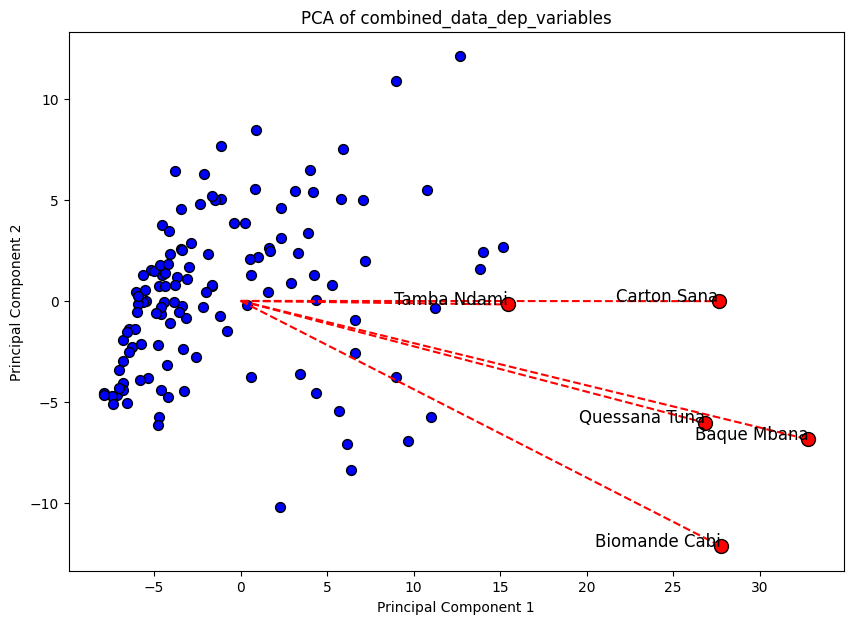

In [21]:
# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Realizar el PCA
pca = PCA(n_components=2)  # Cambia n_components según tus necesidades
principal_components = pca.fit_transform(data_scaled)

# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_dep_grouped['id']

# Mostrar las primeras filas del DataFrame de componentes principales
print(principal_df.head())

# Seleccionar los IDs más relevantes (por ejemplo, los 5 valores absolutos más altos de PC1)
top_n = 5
top_ids = principal_df.nlargest(top_n, 'PC1')['id']

# Graficar los componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)

# Añadir las líneas y etiquetas para los IDs más relevantes
for i in range(len(principal_df)):
    if principal_df.loc[i, 'id'] in top_ids.values:
        plt.scatter(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], c='red', edgecolor='k', s=100)
        plt.text(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], principal_df.loc[i, 'id'], fontsize=12, ha='right')
        plt.plot([0, principal_df.loc[i, 'PC1']], [0, principal_df.loc[i, 'PC2']], 'r--')

plt.title('PCA of combined_data_dep_variables')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(False)
plt.show()


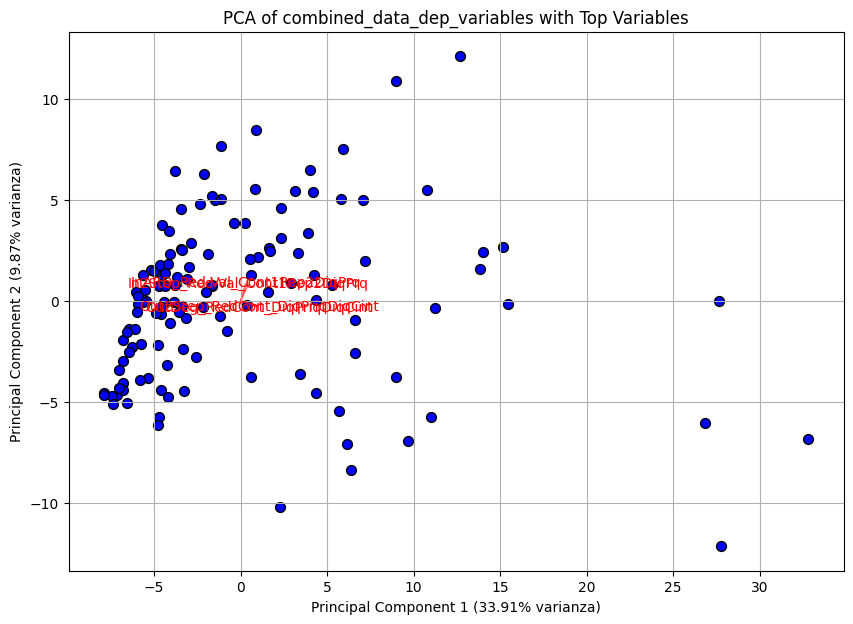

In [41]:
# Agrupar por 'id' y calcular la media (si es necesario)
data_frame_combinado_indep_grouped = data_frame_combinado.groupby('id').mean().reset_index()

# Eliminar la columna 'id' para realizar el PCA
data_for_pca = data_frame_combinado_indep_grouped.drop(columns=['id'])

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Realizar el PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_indep_grouped['id']

# Calcular la contribución de cada variable a los componentes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear un DataFrame con los loadings
loading_df = pd.DataFrame(loadings, index=data_for_pca.columns, columns=['PC1', 'PC2'])

# Seleccionar las variables más relevantes (por ejemplo, las 5 con mayor contribución en PC1 y PC2)
top_n = 2
top_vars_PC1 = loading_df['PC1'].abs().nlargest(top_n).index
top_vars_PC2 = loading_df['PC2'].abs().nlargest(top_n).index
top_vars = set(top_vars_PC1).union(set(top_vars_PC2))

# Graficar los componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)

explained_var_ratio = pca.explained_variance_ratio_



# Añadir las líneas y etiquetas para las variables más relevantes
for var in top_vars:
    plt.arrow(0, 0, loading_df.loc[var, 'PC1'], loading_df.loc[var, 'PC2'], 
              color='red', alpha=0.5, head_width=0.05)
    plt.text(loading_df.loc[var, 'PC1'] * 1.15, loading_df.loc[var, 'PC2'] * 1.15, 
             var, color='red', ha='center', va='center')

plt.title('PCA of combined_data_dep_variables with Top Variables')
plt.xlabel(f'Principal Component 1 ({explained_var_ratio[0]*100:.2f}% varianza)')
plt.ylabel(f'Principal Component 2 ({explained_var_ratio[1]*100:.2f}% varianza)')
plt.grid(True)
plt.show()

In [42]:
print(top_vars)

{'Out2Step_RedCont_DiqPriqDiqCint', 'InARD_Red-Val_Cont1Rep2DiqPrq', 'OutDeg_RedCont_DiqPriqDiqCint', 'In2Step_Red-Val_Cont1Rep2DiqPrq'}


## Exploratory analysis of independen data

In [29]:
data_frame_combinado_indep = pd.read_csv('../DataIntermediate/combined_data_indep_variables.csv', sep = ',')

data_frame_combinado_indep.head()

,id,OutDeg_Var.Expl_RedConfliAguaTot,Indeg_Var.Expl_RedConfliAguaTot,Out2local_Var.Expl_RedConfliAguaTot,In2local_Var.Expl_RedConfliAguaTot,OutBetaCent_Var.Expl_RedConfliAguaTot,InBetaCent_Var.Expl_RedConfliAguaTot,Out2Step_Var.Expl_RedConfliAguaTot,In2Step_Var.Expl_RedConfliAguaTot,OutARD_Var.Expl_RedConfliAguaTot,...,Out2Step_Var.Explic_RedeEmprestParcel,In2Step_Var.Explic_RedeEmprestParcel,OutARD_Var.Explic_RedeEmprestParcel,InARD_Var.Explic_RedeEmprestParcel,OutClose_Var.Explic_RedeEmprestParcel,InClose_Var.Explic_RedeEmprestParcel,Between_Var.Explic_RedeEmprestParcel,2StepBet_Var.Explic_RedeEmprestParcel,Frag_Var.Explic_RedeEmprestParcel,DwFrag_Var.Explic_RedeEmprestParcel
0,Aiace Quior,0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
1,Alamada Bia,0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
2,Alanghate Mfumba,0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
3,Albat Calabus,0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
4,Americano Mbunde,0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036


In [30]:
# Agrupar por 'id' y calcular la media (si es necesario)
data_frame_combinado_indep_grouped = data_frame_combinado_indep.groupby('id').mean().reset_index()

# Eliminar la columna 'id' para realizar el PCA
data_for_pca = data_frame_combinado_indep_grouped.drop(columns=['id'])


data_frame_combinado_indep_grouped.head()

,id,OutDeg_Var.Expl_RedConfliAguaTot,Indeg_Var.Expl_RedConfliAguaTot,Out2local_Var.Expl_RedConfliAguaTot,In2local_Var.Expl_RedConfliAguaTot,OutBetaCent_Var.Expl_RedConfliAguaTot,InBetaCent_Var.Expl_RedConfliAguaTot,Out2Step_Var.Expl_RedConfliAguaTot,In2Step_Var.Expl_RedConfliAguaTot,OutARD_Var.Expl_RedConfliAguaTot,...,Out2Step_Var.Explic_RedeEmprestParcel,In2Step_Var.Explic_RedeEmprestParcel,OutARD_Var.Explic_RedeEmprestParcel,InARD_Var.Explic_RedeEmprestParcel,OutClose_Var.Explic_RedeEmprestParcel,InClose_Var.Explic_RedeEmprestParcel,Between_Var.Explic_RedeEmprestParcel,2StepBet_Var.Explic_RedeEmprestParcel,Frag_Var.Explic_RedeEmprestParcel,DwFrag_Var.Explic_RedeEmprestParcel
0,Aiace Quior,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,516.0,516.0,0.0,0.0,-0.000038,-0.000036
1,Alamada Bia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,516.0,516.0,0.0,0.0,-0.000038,-0.000036
2,Alanghate Mfumba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,516.0,516.0,0.0,0.0,-0.000038,-0.000036
3,Albat Calabus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,516.0,516.0,0.0,0.0,-0.000038,-0.000036
4,Americano Mbunde,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,516.0,516.0,0.0,0.0,-0.000038,-0.000036


        PC1       PC2                id
0 -2.065889  3.577284       Aiace Quior
1 -4.017326 -2.862902       Alamada Bia
2 -4.085070 -2.998400  Alanghate Mfumba
3 -2.685130 -1.021069     Albat Calabus
4 -4.763018 -5.002499  Americano Mbunde


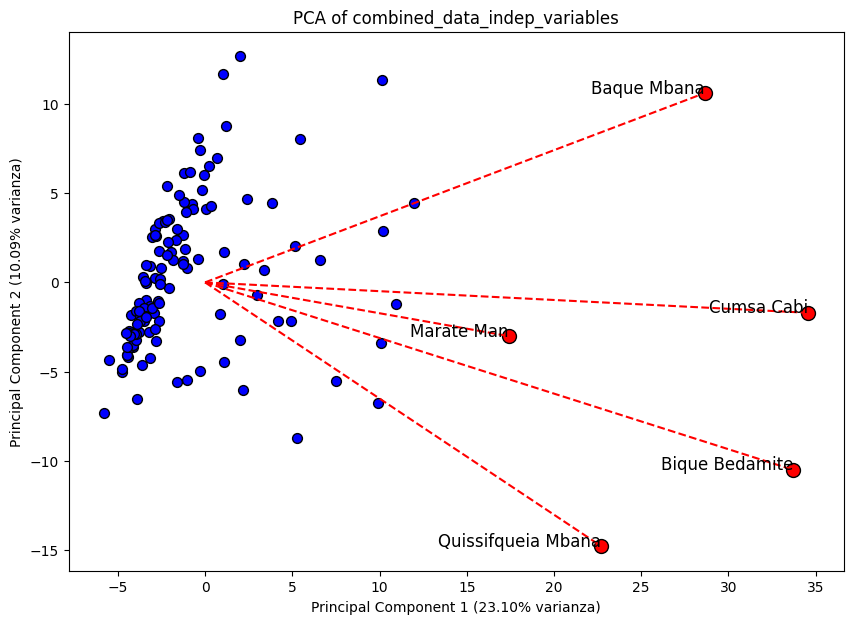

In [40]:

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Realizar el PCA
pca = PCA(n_components=2)  # Cambia n_components según tus necesidades
principal_components = pca.fit_transform(data_scaled)

# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_indep_grouped['id']

# Mostrar las primeras filas del DataFrame de componentes principales
print(principal_df.head())

# Seleccionar los IDs más relevantes (por ejemplo, los 5 valores absolutos más altos de PC1)
top_n = 5
top_ids = principal_df.nlargest(top_n, 'PC1')['id']

# Graficar los componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)
explained_var_ratio = pca.explained_variance_ratio_


# Añadir las líneas y etiquetas para los IDs más relevantes
for i in range(len(principal_df)):
    if principal_df.loc[i, 'id'] in top_ids.values:
        plt.scatter(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], c='red', edgecolor='k', s=100)
        plt.text(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], principal_df.loc[i, 'id'], fontsize=12, ha='right')
        plt.plot([0, principal_df.loc[i, 'PC1']], [0, principal_df.loc[i, 'PC2']], 'r--')

plt.title('PCA of combined_data_indep_variables')
plt.xlabel(f'Principal Component 1 ({explained_var_ratio[0]*100:.2f}% varianza)')
plt.ylabel(f'Principal Component 2 ({explained_var_ratio[1]*100:.2f}% varianza)')

plt.grid(False)
plt.show()

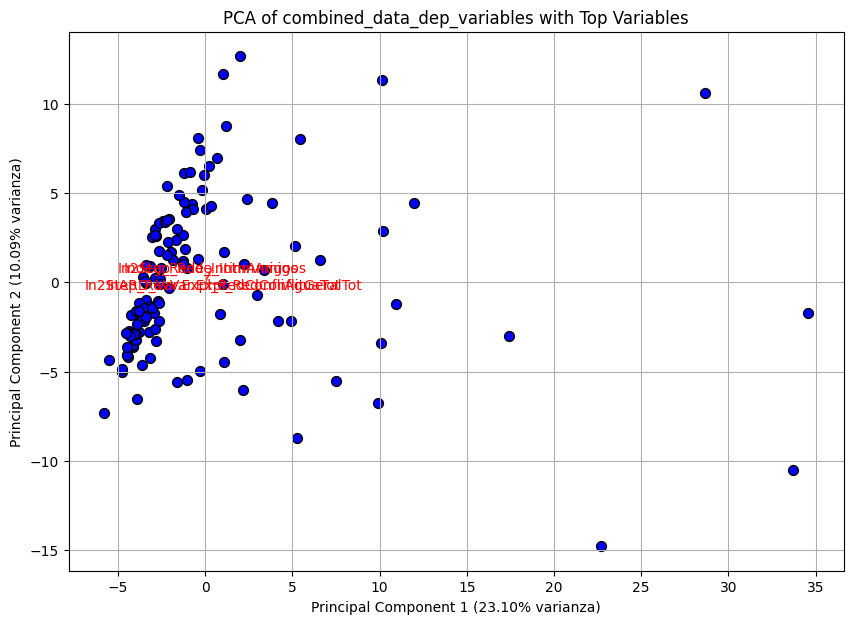

In [37]:
# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_indep_grouped['id']

# Calcular la contribución de cada variable a los componentes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear un DataFrame con los loadings
loading_df = pd.DataFrame(loadings, index=data_for_pca.columns, columns=['PC1', 'PC2'])

# Seleccionar las variables más relevantes (por ejemplo, las 5 con mayor contribución en PC1 y PC2)
top_n = 2
top_vars_PC1 = loading_df['PC1'].abs().nlargest(top_n).index
top_vars_PC2 = loading_df['PC2'].abs().nlargest(top_n).index
top_vars = set(top_vars_PC1).union(set(top_vars_PC2))

# Graficar los componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)

# Añadir las líneas y etiquetas para las variables más relevantes
for var in top_vars:
    plt.arrow(0, 0, loading_df.loc[var, 'PC1'], loading_df.loc[var, 'PC2'], 
              color='red', alpha=0.5, head_width=0.05)
    plt.text(loading_df.loc[var, 'PC1'] * 1.15, loading_df.loc[var, 'PC2'] * 1.15, 
             var, color='red', ha='center', va='center')

plt.title('PCA of combined_data_dep_variables with Top Variables')
plt.xlabel(f'Principal Component 1 ({explained_var_ratio[0]*100:.2f}% varianza)')
plt.ylabel(f'Principal Component 2 ({explained_var_ratio[1]*100:.2f}% varianza)')
plt.grid(True)
plt.show()

In [38]:
print(top_vars)

{'In2Step_RevVar.Expl_RedConflitGeralTot', 'InARD_Var.Expl_RedConfliAguaTot', 'Indeg_Rede_IntimAmigos', 'In2Step_Rede_IntimAmigos'}
